# 단순회귀 - 당뇨병 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- 당뇨병 데이터 셋

In [19]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [20]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


- 당뇨병(target) vs. BMI

In [20]:
X = df.bmi.values.reshape(-1,1)
y = diabetes.target
X.shape, y.shape

((442, 1), (442,))

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [5]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
weight[0], bias, rss

(949.4352603839491, 152.1334841628967, 1719581.810773882)

In [6]:
lr.score(X,y)

0.3439237602253803

- train/test data 분리
- test_size = 0.1

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2021
)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
pred = lr.predict(X_test)
pred[:4]

array([145.16480259, 189.42846189, 150.43428584,  97.73945334])

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.17874580965139086

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3577.1382963531237, 59.809182374892266)

- 그래프로 확인

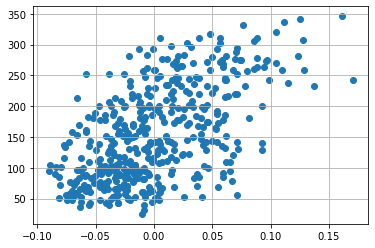

In [12]:
plt.scatter(X, y)
plt.grid()
plt.show()

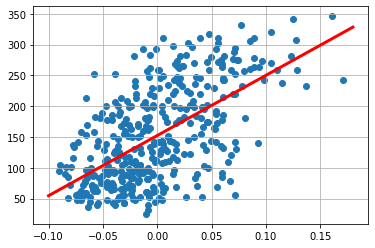

In [13]:
w, b = lr.coef_, lr.intercept_
plt.scatter(X_train, y_train)
plt.plot([-0.1,0.18], [-0.1*w+b, 0.18*w+b], 'r', lw=3)
plt.grid()
plt.show()

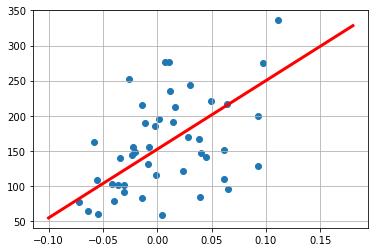

In [14]:
plt.scatter(X_test, y_test)
plt.plot([-0.1,0.18], [-0.1*w+b, 0.18*w+b], 'r', lw=3)
plt.grid()
plt.show()

- 당뇨병 vs BP

In [21]:
X = df.bp.values.reshape(-1,1)
y = diabetes.target
X.shape, y.shape

((442, 1), (442,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2021
)

In [22]:
diabetes.data[:,3:4].shape

(442, 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:,3:4], diabetes.target, test_size=0.1, random_state=2021
)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [25]:
w, b = lr.coef_[0], lr.intercept_
rss = lr._residues
w, b, rss

(721.617889683252, 151.20147738352864, 1958279.847612233)

In [26]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
mse, rmse, r2

(3384.5528828725055, 58.17691022108776, 0.22296036461624136)

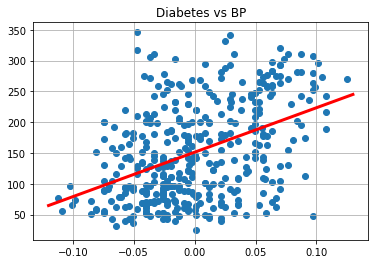

In [27]:
plt.scatter(X_train, y_train)
plt.plot([-0.12,0.13], [-0.12*w+b, 0.13*w+b], 'r', lw=3)
plt.title('Diabetes vs BP')
plt.grid()
plt.show()

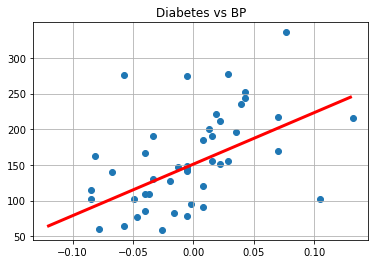

In [28]:
plt.scatter(X_test, y_test)
plt.plot([-0.12,0.13], [-0.12*w+b, 0.13*w+b], 'r', lw=3)
plt.title('Diabetes vs BP')
plt.grid()
plt.show()

In [29]:
### 회귀표본 만들어 연습하기

In [30]:
from sklearn.datasets import make_regression
X,y = make_regression(
    n_samples=100, n_features=1, n_targets=1, random_state=2021
)

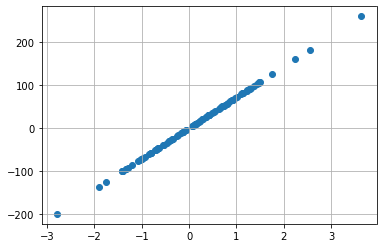

In [31]:
plt.scatter(X,y)
plt.grid()
plt.show()

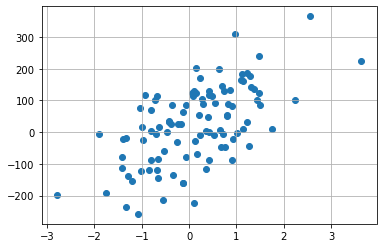

In [33]:
X,y = make_regression(
    n_samples=100,n_features=1, n_targets=1,
    noise=100, bias=10, random_state=2021
)
plt.scatter(X,y)
plt.grid()
plt.show()

In [34]:
lr = LinearRegression()
lr.fit(X,y)
w, b = lr.coef_[0], lr.intercept_

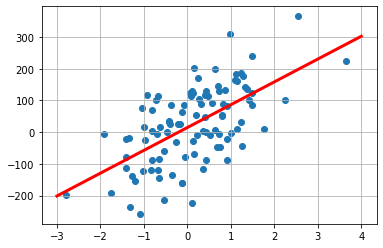

In [35]:
plt.scatter(X,y)
plt.plot([-3,4],[-3*w+b, 4*w+b], 'r', lw=3)
plt.grid()
plt.show()

In [36]:
r2= lr.score(X,y)
w, b, r2

(71.93719814461535, 14.538265236532116, 0.364424472577878)